## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import torch.optim as optim


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')

root_path = 'fmnist'
mkdir(root_path)

Directory fmnist is created!


In [ ]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path,
                                                        train=True,
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path,
                                                       train=False,
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.8MB/s]


Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 303kB/s]


Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.61MB/s]


Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.12MB/s]

Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [ ]:
len(fmnist_dataset_test)

10000

In [ ]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [ ]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, num_classes)  # Выходной слой для предсказания классов
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [ ]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
       BatchNorm1d-3                  [-1, 512]           1,024
              ReLU-4                  [-1, 512]               0
           Dropout-5                  [-1, 512]               0
            Linear-6                  [-1, 256]         131,328
       BatchNorm1d-7                  [-1, 256]             512
              ReLU-8                  [-1, 256]               0
            Linear-9                  [-1, 128]          32,896
      BatchNorm1d-10                  [-1, 128]             256
             ReLU-11                  [-1, 128]               0
           Linear-12                   [-1, 10]           1,290
Total params: 569,226
Trainable params: 569,226
Non-trainable params: 0
-------------------------------

Your experiments come here:

Epoch [1/10]
Train Loss: 0.4818, Train Accuracy: 0.8314
Test Loss: 0.3746, Test Accuracy: 0.8609
Epoch [2/10]
Train Loss: 0.3585, Train Accuracy: 0.8686
Test Loss: 0.3491, Test Accuracy: 0.8697
Epoch [3/10]
Train Loss: 0.3253, Train Accuracy: 0.8796
Test Loss: 0.3372, Test Accuracy: 0.8735
Epoch [4/10]
Train Loss: 0.3010, Train Accuracy: 0.8869
Test Loss: 0.3363, Test Accuracy: 0.8757
Epoch [5/10]
Train Loss: 0.2845, Train Accuracy: 0.8942
Test Loss: 0.3233, Test Accuracy: 0.8805
Epoch [6/10]
Train Loss: 0.2701, Train Accuracy: 0.8992
Test Loss: 0.3144, Test Accuracy: 0.8823
Epoch [7/10]
Train Loss: 0.2601, Train Accuracy: 0.9016
Test Loss: 0.3335, Test Accuracy: 0.8791
Epoch [8/10]
Train Loss: 0.2498, Train Accuracy: 0.9061
Test Loss: 0.3009, Test Accuracy: 0.8901
Epoch [9/10]
Train Loss: 0.2396, Train Accuracy: 0.9100
Test Loss: 0.3070, Test Accuracy: 0.8894
Epoch [10/10]
Train Loss: 0.2267, Train Accuracy: 0.9145
Test Loss: 0.2983, Test Accuracy: 0.8948


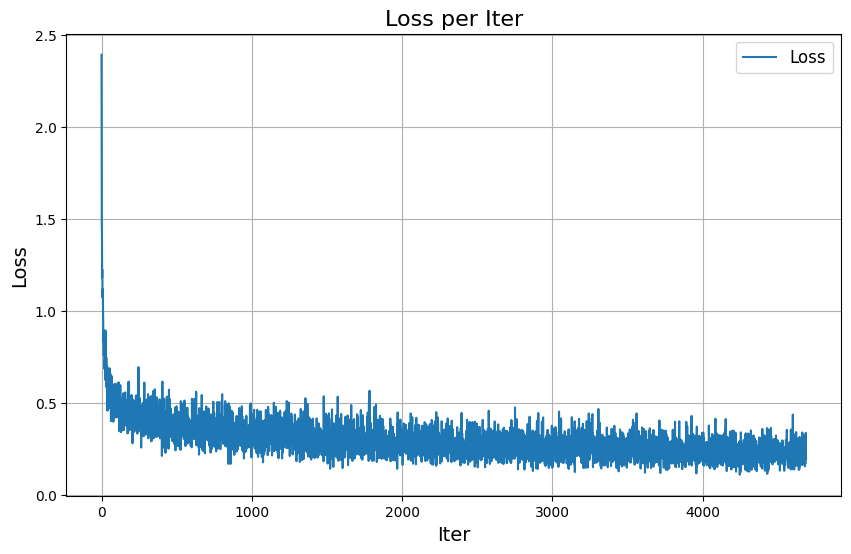

In [ ]:
model = TinyNeuralNetwork().to(device)
opt = optim.Adam(model.parameters(), lr=0.001) # YOUR CODE HERE
loss_func = nn.CrossEntropyLoss()# YOUR CODE HERE
train_loss_per_iteration = []

# Your experiments, training and validation loops here
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    total_samples = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Обнуление градиентов
        opt.zero_grad()

        # Прямой проход
        outputs = model(X_batch)

        # Вычисление функции потерь
        loss = loss_func(outputs, y_batch)
        train_loss += loss.item()
        train_loss_per_iteration.append(loss.item())

        # Обратный проход
        loss.backward()
        opt.step()

        # Подсчет точности
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == y_batch).sum().item()
        total_samples += y_batch.size(0)

    train_accuracy = train_correct / total_samples

    # Валидация
    model.eval()
    val_loss = 0
    val_correct = 0
    total_val_samples = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = loss_func(outputs, y_batch)
            val_loss += loss.item()

            # Подсчет точности
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == y_batch).sum().item()
            total_val_samples += y_batch.size(0)

    val_accuracy = val_correct / total_val_samples

    # Вывод результатов на текущей эпохе
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Loss: {val_loss/len(test_loader):.4f}, Test Accuracy: {val_accuracy:.4f}")
# график потерь
plt.figure(figsize=(10, 6))
plt.plot(train_loss_per_iteration, label='Loss', linewidth=1.5)
plt.title('Loss per Iter', fontsize=16)
plt.xlabel('Iter', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [ ]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 4096),  # Первый линейный слой с большим количеством нейронов
            nn.ReLU(),  # убрали нормализацию
            nn.Linear(4096, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)

        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [ ]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 4096]       3,215,360
              ReLU-3                 [-1, 4096]               0
            Linear-4                 [-1, 2048]       8,390,656
              ReLU-5                 [-1, 2048]               0
            Linear-6                 [-1, 1024]       2,098,176
              ReLU-7                 [-1, 1024]               0
            Linear-8                  [-1, 512]         524,800
              ReLU-9                  [-1, 512]               0
           Linear-10                   [-1, 10]           5,130
Total params: 14,234,122
Trainable params: 14,234,122
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 54.30
Esti

Epoch [1/30]
Train Loss: 2.3014, Train Accuracy: 0.1200
Test Loss: 2.2616, Test Accuracy: 0.1848
Epoch [2/30]
Train Loss: 2.1942, Train Accuracy: 0.2300
Test Loss: 2.3303, Test Accuracy: 0.1866
Epoch [3/30]
Train Loss: 2.0355, Train Accuracy: 0.2300
Test Loss: 2.1386, Test Accuracy: 0.1931
Epoch [4/30]
Train Loss: 2.0292, Train Accuracy: 0.2200
Test Loss: 1.8090, Test Accuracy: 0.3567
Epoch [5/30]
Train Loss: 1.7371, Train Accuracy: 0.4100
Test Loss: 1.5605, Test Accuracy: 0.4485
Epoch [6/30]
Train Loss: 1.4240, Train Accuracy: 0.5300
Test Loss: 1.4447, Test Accuracy: 0.4151
Epoch [7/30]
Train Loss: 1.1725, Train Accuracy: 0.5300
Test Loss: 1.3124, Test Accuracy: 0.4868
Epoch [8/30]
Train Loss: 0.9430, Train Accuracy: 0.6800
Test Loss: 1.2280, Test Accuracy: 0.4985
Epoch [9/30]
Train Loss: 0.8967, Train Accuracy: 0.5600
Test Loss: 1.5118, Test Accuracy: 0.4468
Epoch [10/30]
Train Loss: 0.9349, Train Accuracy: 0.5700
Test Loss: 1.1978, Test Accuracy: 0.6066
Epoch [11/30]
Train Loss: 0.6

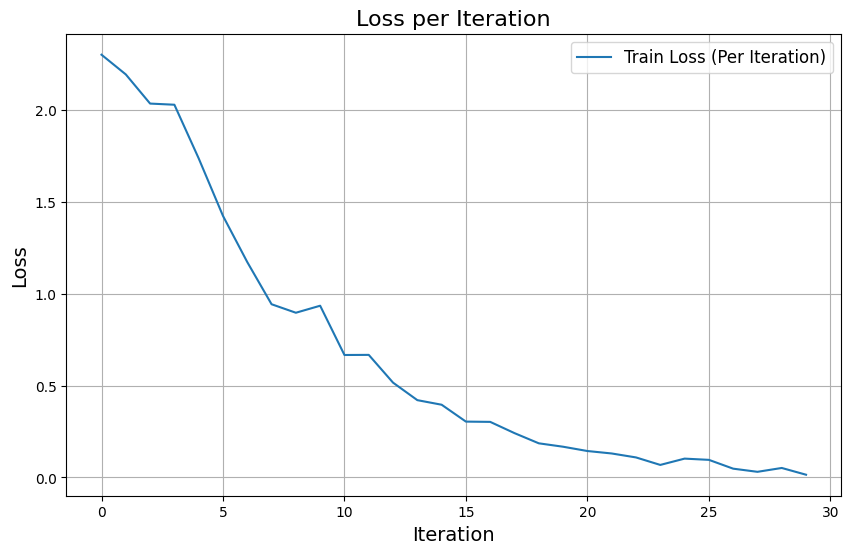

In [ ]:
from torch.utils.data import Subset
# Уменьшение трейна
small_train_dataset = Subset(fmnist_dataset_train, range(100))  # Используем только 100
train_loader = torch.utils.data.DataLoader(small_train_dataset,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
model = OverfittingNeuralNetwork().to(device)
opt = optim.Adam(model.parameters(), lr=0.001)# YOUR CODE HERE
loss_func = nn.CrossEntropyLoss()# YOUR CODE HERE
train_loss_per_iteration = []
num_epochs = 30 #увеличим число эпох
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    total_samples = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Обнуление градиентов
        opt.zero_grad()

        # Прямой проход
        outputs = model(X_batch)

        # Вычисление функции потерь
        loss = loss_func(outputs, y_batch)
        train_loss += loss.item()
        train_loss_per_iteration.append(loss.item())

        # Обратный проход
        loss.backward()
        opt.step()

        # Подсчет точности
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == y_batch).sum().item()
        total_samples += y_batch.size(0)

    train_accuracy = train_correct / total_samples

    # Валидация
    model.eval()
    val_loss = 0
    val_correct = 0
    total_val_samples = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = loss_func(outputs, y_batch)
            val_loss += loss.item()

            # Подсчет точности
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == y_batch).sum().item()
            total_val_samples += y_batch.size(0)

    val_accuracy = val_correct / total_val_samples

    # Вывод результатов на текущей эпохе
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Loss: {val_loss/len(test_loader):.4f}, Test Accuracy: {val_accuracy:.4f}")

# График потерь
plt.figure(figsize=(10, 6))
plt.plot(train_loss_per_iteration, label='Train Loss (Per Iteration)', linewidth=1.5)
plt.title('Loss per Iteration', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

получили переобученную модель, поскольку потери на трейне практически нулевые, а точность почти 100%. Тестовые же потери увеличиваются, а точность стабилизировалась на 70%.

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

In [ ]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 4096),  # Первый линейный слой
            nn.BatchNorm1d(4096),  # BatchNorm для нормализации
            nn.ReLU(),
            nn.Dropout(0.6),  # Dropout для регуляризации
            nn.Linear(4096, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(512, num_classes)

        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [ ]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 4096]       3,215,360
       BatchNorm1d-3                 [-1, 4096]           8,192
              ReLU-4                 [-1, 4096]               0
           Dropout-5                 [-1, 4096]               0
            Linear-6                 [-1, 2048]       8,390,656
       BatchNorm1d-7                 [-1, 2048]           4,096
              ReLU-8                 [-1, 2048]               0
           Dropout-9                 [-1, 2048]               0
           Linear-10                 [-1, 1024]       2,098,176
      BatchNorm1d-11                 [-1, 1024]           2,048
             ReLU-12                 [-1, 1024]               0
          Dropout-13                 [-1, 1024]               0
           Linear-14                  [

Epoch [1/30]
Train Loss: 2.5081, Train Accuracy: 0.1400
Test Loss: 2.2933, Test Accuracy: 0.1964
Epoch [2/30]
Train Loss: 2.2267, Train Accuracy: 0.1900
Test Loss: 2.2717, Test Accuracy: 0.4130
Epoch [3/30]
Train Loss: 1.9913, Train Accuracy: 0.3000
Test Loss: 2.2273, Test Accuracy: 0.4607
Epoch [4/30]
Train Loss: 1.7056, Train Accuracy: 0.4900
Test Loss: 2.1582, Test Accuracy: 0.4473
Epoch [5/30]
Train Loss: 1.4258, Train Accuracy: 0.5300
Test Loss: 2.0644, Test Accuracy: 0.4588
Epoch [6/30]
Train Loss: 1.2719, Train Accuracy: 0.6400
Test Loss: 1.9512, Test Accuracy: 0.4670
Epoch [7/30]
Train Loss: 1.2664, Train Accuracy: 0.6000
Test Loss: 1.8323, Test Accuracy: 0.4810
Epoch [8/30]
Train Loss: 1.1539, Train Accuracy: 0.6000
Test Loss: 1.7109, Test Accuracy: 0.4945
Epoch [9/30]
Train Loss: 0.9912, Train Accuracy: 0.6900
Test Loss: 1.5984, Test Accuracy: 0.5086
Epoch [10/30]
Train Loss: 0.8651, Train Accuracy: 0.7200
Test Loss: 1.4988, Test Accuracy: 0.5182
Epoch [11/30]
Train Loss: 0.7

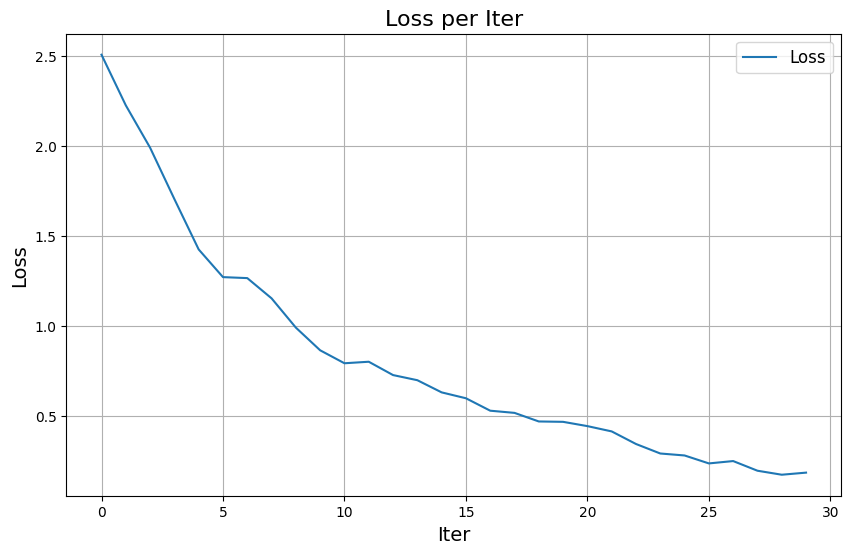

In [ ]:
model = FixedNeuralNetwork().to(device)
opt = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4) # YOUR CODE HERE добавили L2 регуляризацию
loss_func = nn.CrossEntropyLoss()# YOUR CODE HERE
train_loss_per_iteration = []

# Your experiments, training and validation loops here
num_epochs = 30 #уменьшаем взад число эпох
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    total_samples = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Обнуление градиентов
        opt.zero_grad()

        # Прямой проход
        outputs = model(X_batch)

        # Вычисление функции потерь
        loss = loss_func(outputs, y_batch)
        train_loss += loss.item()
        train_loss_per_iteration.append(loss.item())

        # Обратный проход
        loss.backward()
        opt.step()

        # Подсчет точности
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == y_batch).sum().item()
        total_samples += y_batch.size(0)

    train_accuracy = train_correct / total_samples

    # Валидация
    model.eval()
    val_loss = 0
    val_correct = 0
    total_val_samples = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = loss_func(outputs, y_batch)
            val_loss += loss.item()

            # Подсчет точности
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == y_batch).sum().item()
            total_val_samples += y_batch.size(0)

    val_accuracy = val_correct / total_val_samples

    # Вывод результатов на текущей эпохе
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Loss: {val_loss/len(test_loader):.4f}, Test Accuracy: {val_accuracy:.4f}")
# график потерь
plt.figure(figsize=(10, 6))
plt.plot(train_loss_per_iteration, label='Loss', linewidth=1.5)
plt.title('Loss per Iter', fontsize=16)
plt.xlabel('Iter', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

### Conclusions:
_Write down small report with your conclusions and your ideas._
Итак мы сделали переобучемую модель увеличив ее сложность путем увеличения числа слоев и нейронов в слоях. Исключили любую регуляризацию. для обучения стали использовать очень маленькую выборку.

Для лечения использовали регуляризацию в виде батчнормализации и дропаута. Сначала это не помогало -  начиная с 25 эпохи приводило к переобучению (также пробовал менял величину вероятности выключения нейронов и положения батч нормализации и дропаута), думал, что можно было бы еще сделать. В итоге добавил L2 регуляризацию с коэффициентом 0,0001, это позволило алгоритму сдерживать значение весов и, таким образом, это помогло победить переобучение модели.

ПС логичным было бы уменьшить число эпох и увеличить трейн датасет, этого не делал принципиально, для чистоты сравнения.